# Primeira Parte

## Import das bibliotecas e dos dados

In [1]:
# Import das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
df.shape

(289, 1147)

## Algumas funções da biblioteca Pandas

In [5]:
# Pegando uma coluna do dataframe

df["Country/Region"]

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

In [6]:
# Pegando os valores de forma unica da coluna específica

df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [7]:
# Contando as aparições dos valores na coluna específica

df["Country/Region"].value_counts()

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [8]:
# Pegando a coluna da ultima data registrada

last_date = "3/9/23"
df[last_date]

0      209451
1      334457
2      271496
3       47890
4      105288
        ...  
284    703228
285       535
286     11945
287    343135
288    264276
Name: 3/9/23, Length: 289, dtype: int64

In [9]:
# Localizando uma linha a partir de sua posição no dataframe

df.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
3/5/23                 209390
3/6/23                 209406
3/7/23                 209436
3/8/23                 209451
3/9/23                 209451
Name: 0, Length: 1147, dtype: object

In [10]:
# Localizando uma linha a partir de seu index (seja ele numérico ou não)

df.loc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
3/5/23                 209390
3/6/23                 209406
3/7/23                 209436
3/8/23                 209451
3/9/23                 209451
Name: 0, Length: 1147, dtype: object

## Análise dos casos confirmados por país

In [11]:
# Agrupando os casos confirmados por país

confirmed_by_country = df.groupby("Country/Region").sum()
confirmed_by_country.head()

<ipython-input-11-d5fd052cfdb3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed_by_country = df.groupby("Country/Region").sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


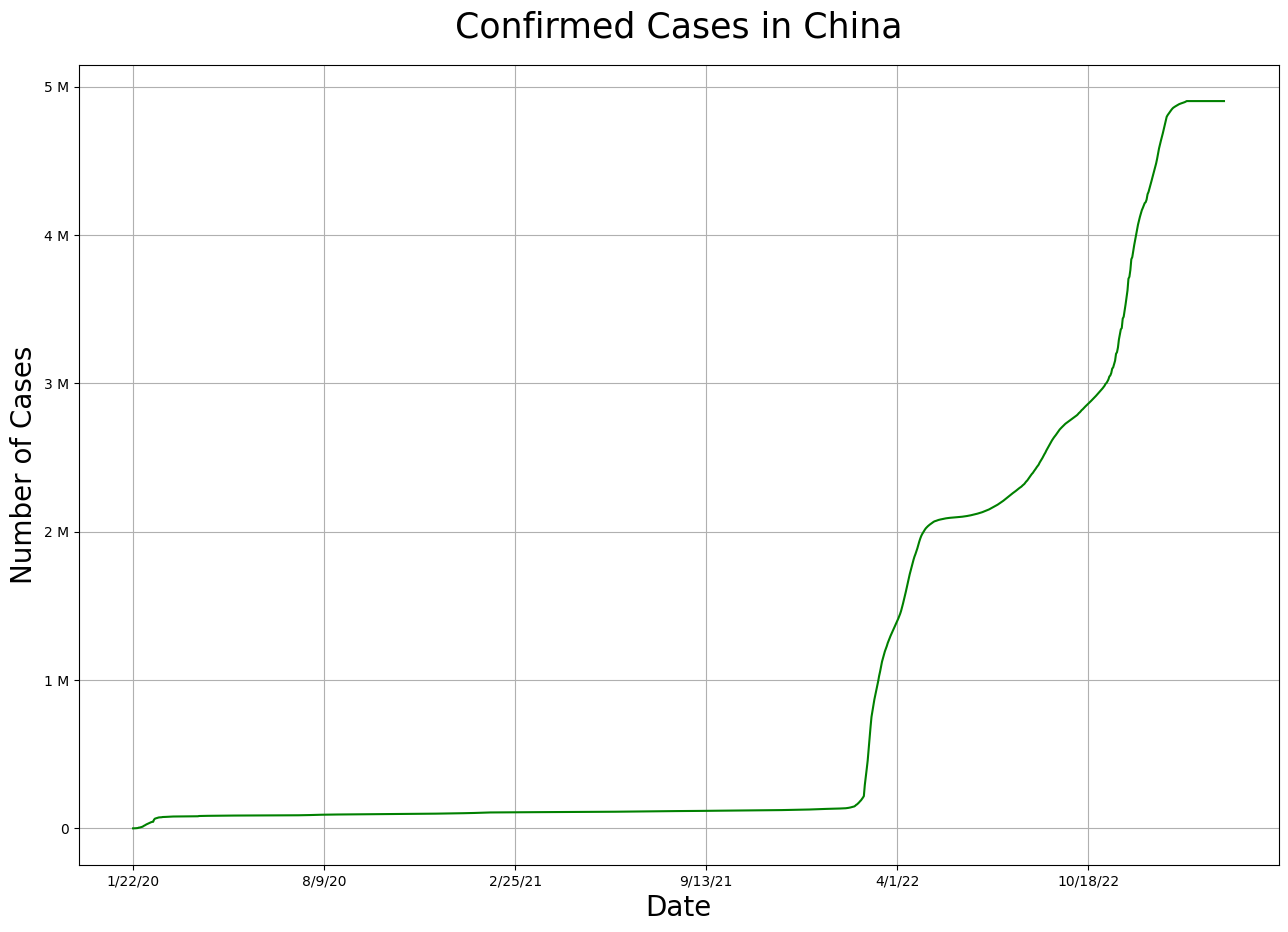

In [12]:
# Gráfico dos casos confirmados na China

confirmed_china = confirmed_by_country.loc["China"][2:]

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax = confirmed_china.plot(color="g")
ax.set_title("Confirmed Cases in China",fontsize=25, pad=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Number of Cases", fontsize=20)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)

fig.show()

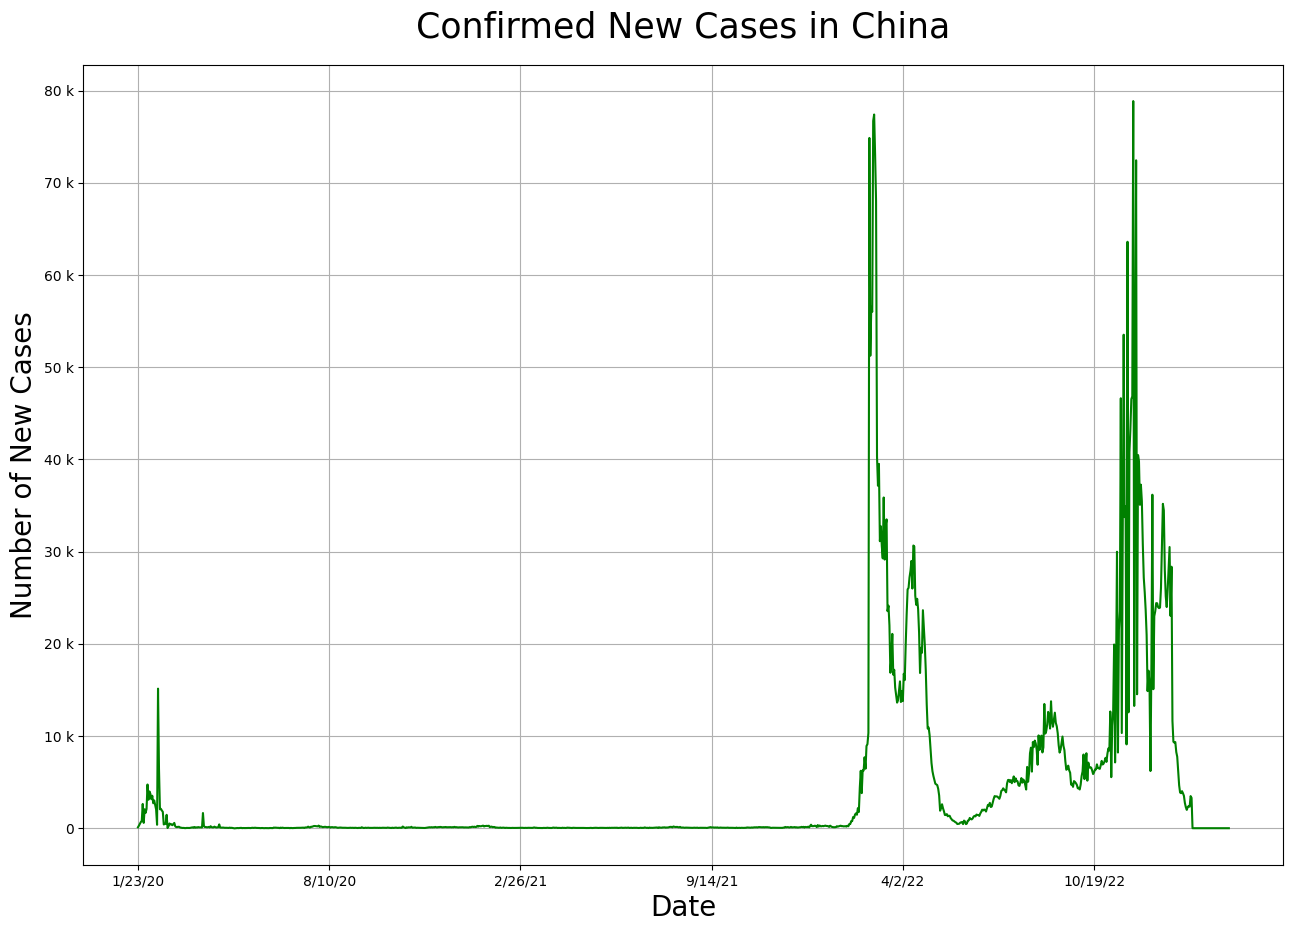

In [13]:
# Gráfico de casos novos com o decorrer do tempo na China

confirmed_china_new = confirmed_china.diff().dropna()

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax = confirmed_china_new.plot(color="g")
ax.set_title("Confirmed New Cases in China",fontsize=25, pad=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Number of New Cases", fontsize=20)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)

fig.show()

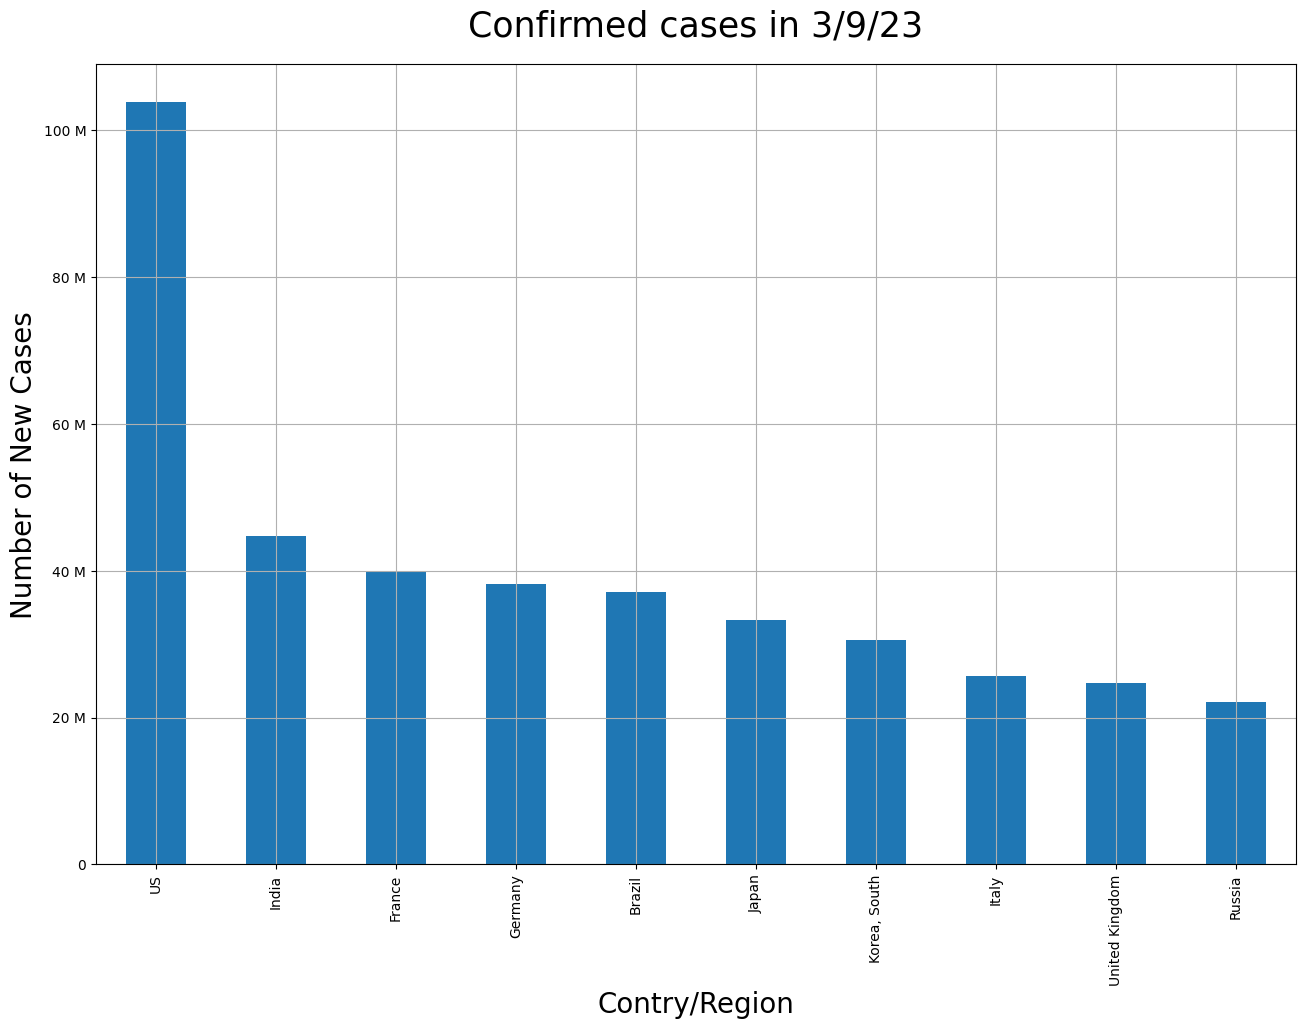

In [14]:
# Análise da quantidade de casos em cada país na última data registrada

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax = confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind="bar")
ax.set_title("Confirmed cases in 3/9/23",fontsize=25, pad=20)
ax.set_xlabel("Contry/Region", fontsize=20)
ax.set_ylabel("Number of New Cases", fontsize=20)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)
fig.show()

## Análise em conjunto com outros dois dataframes de mortes/recuperados

In [15]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
confirmed = df
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [17]:
def last_by_country(data):
  return data.groupby("Country/Region").sum()[last_date]

display(last_by_country(confirmed).head())
display(last_by_country(deaths).head())
display(last_by_country(recovered).head())

<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]


Country/Region
Afghanistan    209451
Albania        334457
Algeria        271496
Andorra         47890
Angola         105288
Name: 3/9/23, dtype: int64

<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]


Country/Region
Afghanistan    7896
Albania        3598
Algeria        6881
Andorra         165
Angola         1933
Name: 3/9/23, dtype: int64

<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]


Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 3/9/23, dtype: int64

In [18]:
informations = [last_by_country(confirmed), last_by_country(deaths), last_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed","deaths","recovered"]
combined.head()

<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]
<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]
<ipython-input-17-0035848474d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[last_date]


,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,209451,7896,0
Albania,334457,3598,0
Algeria,271496,6881,0
Andorra,47890,165,0
Angola,105288,1933,0


In [19]:
# Taxa de letalidade (deaths/confirmed)

sum_up = combined.sum()
letality_rate_1 = (sum_up["deaths"]/sum_up["confirmed"])*100

print(f"Leatlity Rate 1 = {letality_rate_1:.2f} %")

Leatlity Rate 1 = 1.02 %


In [20]:
# Taxa de letalidade por país
letality_rate_1 = (combined["deaths"]/combined["confirmed"])*100

combined["letality_rate_1"] = letality_rate_1
combined.head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,209451,7896,0,3.769855
Albania,334457,3598,0,1.075774
Algeria,271496,6881,0,2.534476
Andorra,47890,165,0,0.344540
Angola,105288,1933,0,1.835917


In [21]:
letality_rate_2 = sum_up["deaths"]/(sum_up["recovered"]+sum_up["deaths"])

print(f"Leatlity Rate 2 = {letality_rate_2:.2f} %")

Leatlity Rate 2 = 1.00 %


In [22]:
letality_rate_2 = (combined["deaths"]/(combined["deaths"]+combined["recovered"]))*100

combined["letality_rate_2"] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,209451,7896,0,3.769855,100.0
Albania,334457,3598,0,1.075774,100.0
Algeria,271496,6881,0,2.534476,100.0
Andorra,47890,165,0,0.344540,100.0
Angola,105288,1933,0,1.835917,100.0


In [23]:
# Ordenação de acordo com a taxa de mortalidade

combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
"Korea, North",1,6,0,600.000000,100.0
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11945,2159,0,18.074508,100.0
Sudan,63829,5017,0,7.860064,100.0
Syria,57467,3164,0,5.505769,100.0
Somalia,27324,1361,0,4.980969,100.0
Peru,4487553,219539,0,4.892176,100.0
Egypt,515759,24812,0,4.810774,100.0
Mexico,7483444,333188,0,4.452335,100.0


<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

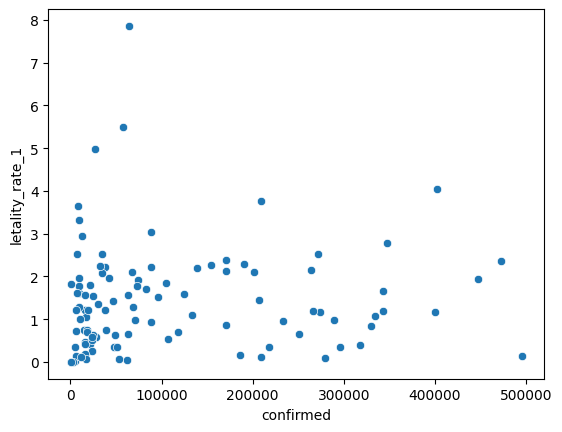

In [24]:
sns.scatterplot(data=combined.query("confirmed > 40 and confirmed < 500000 and letality_rate_1 < 10"), x="confirmed", y="letality_rate_1")

<Axes: xlabel='confirmed', ylabel='letality_rate_2'>

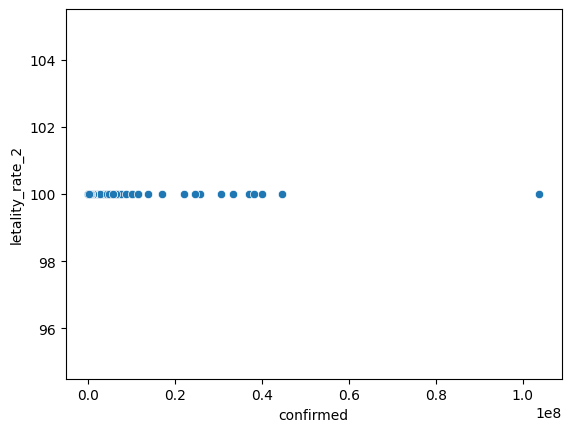

In [25]:
# Na última data que foram coletadas informações não há nenhum caso de recuperação confirmada por conta da pandemia ter chegado ao fim, com poucos casos confirmados.

sns.scatterplot(data=combined.query("confirmed > 1000"), x="confirmed", y="letality_rate_2")

<Axes: xlabel='letality_rate_1', ylabel='Count'>

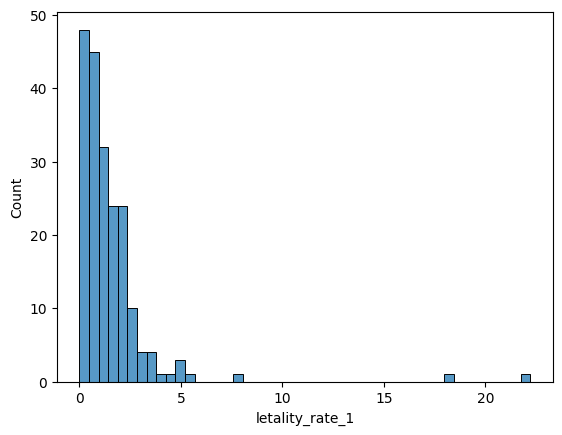

In [26]:
sns.histplot(combined.query("letality_rate_1 < 100")["letality_rate_1"], kde=False)

## Outro método de taxa de mortalidade

In [27]:
def latest_by_country_at(data,date):
  return data.groupby("Country/Region").sum()[date]

informations = [latest_by_country_at(confirmed, "2/8/23"),latest_by_country_at(deaths, "2/20/23"),latest_by_country_at(recovered, "2/20/23")]
combined_2_20_23 = pd.concat(informations,axis=1)
combined_2_20_23.columns = ["confirmed","deaths","recovered"]



<ipython-input-27-10cc32ab4179>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-27-10cc32ab4179>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-27-10cc32ab4179>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]


In [28]:
sum_up = combined_2_20_23.sum()
letality_rate_3 = (sum_up["deaths"]/sum_up["confirmed"])*100
print(f"Leatlity Rate 1 = {letality_rate_3:.2f} %")

Leatlity Rate 1 = 1.02 %


# Segunda Parte

## Comparação da China com os demais países

In [29]:
confirmed.set_index("Country/Region").loc["China"].sum().tail()

3/5/23    4903524
3/6/23    4903524
3/7/23    4903524
3/8/23    4903524
3/9/23    4903524
dtype: object

In [30]:
is_china = confirmed["Country/Region"] == "China"
is_china

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [31]:
confirmed["is_china"] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,False


In [32]:
china_world = confirmed.groupby("is_china").sum()
china_world

<ipython-input-32-3f39ea07db3b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  china_world = confirmed.groupby("is_china").sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
is_china,,,,,,,,,,,,,,,,,,,,,
False,4573.979946,2677.320324,9,14,24,31,45,52,71,82,...,670418714,670639328,670828387,671011056,671065251,671121377,671179417,671309854,671489300,671666625
True,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524


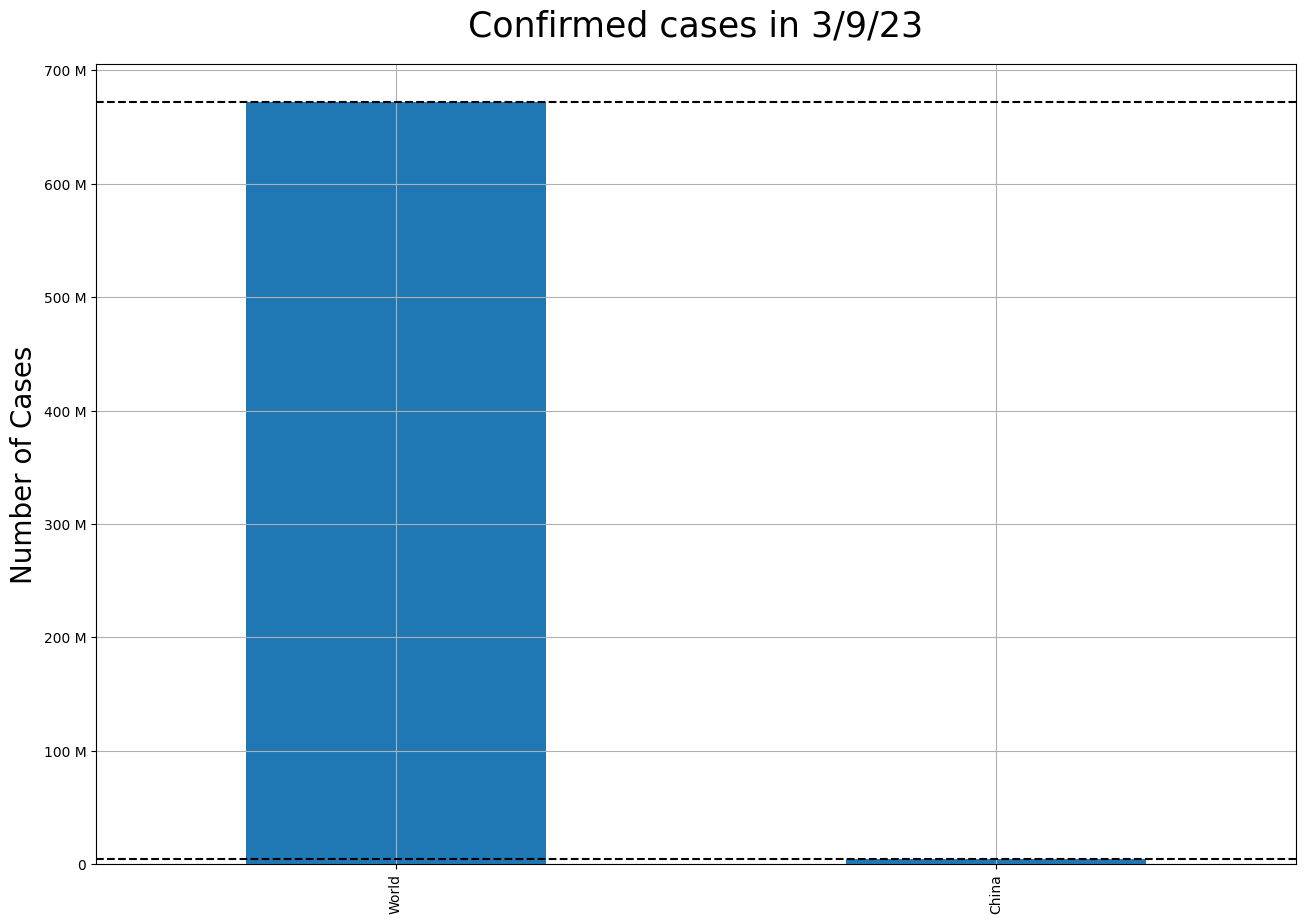

In [33]:
last_date = "3/9/23"

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax = china_world[last_date].plot(kind="bar")
ax.set_title(f"Confirmed cases in {last_date}",fontsize=25, pad=20)
ax.set_xlabel(None)
ax.set_ylabel("Number of Cases", fontsize=20)
ax.set_xticklabels(["World", "China"])
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.axhline(max(china_world[last_date]), color="k", linestyle="--")
ax.axhline(min(china_world[last_date]), color="k", linestyle="--")
ax.grid(True)
fig.show()

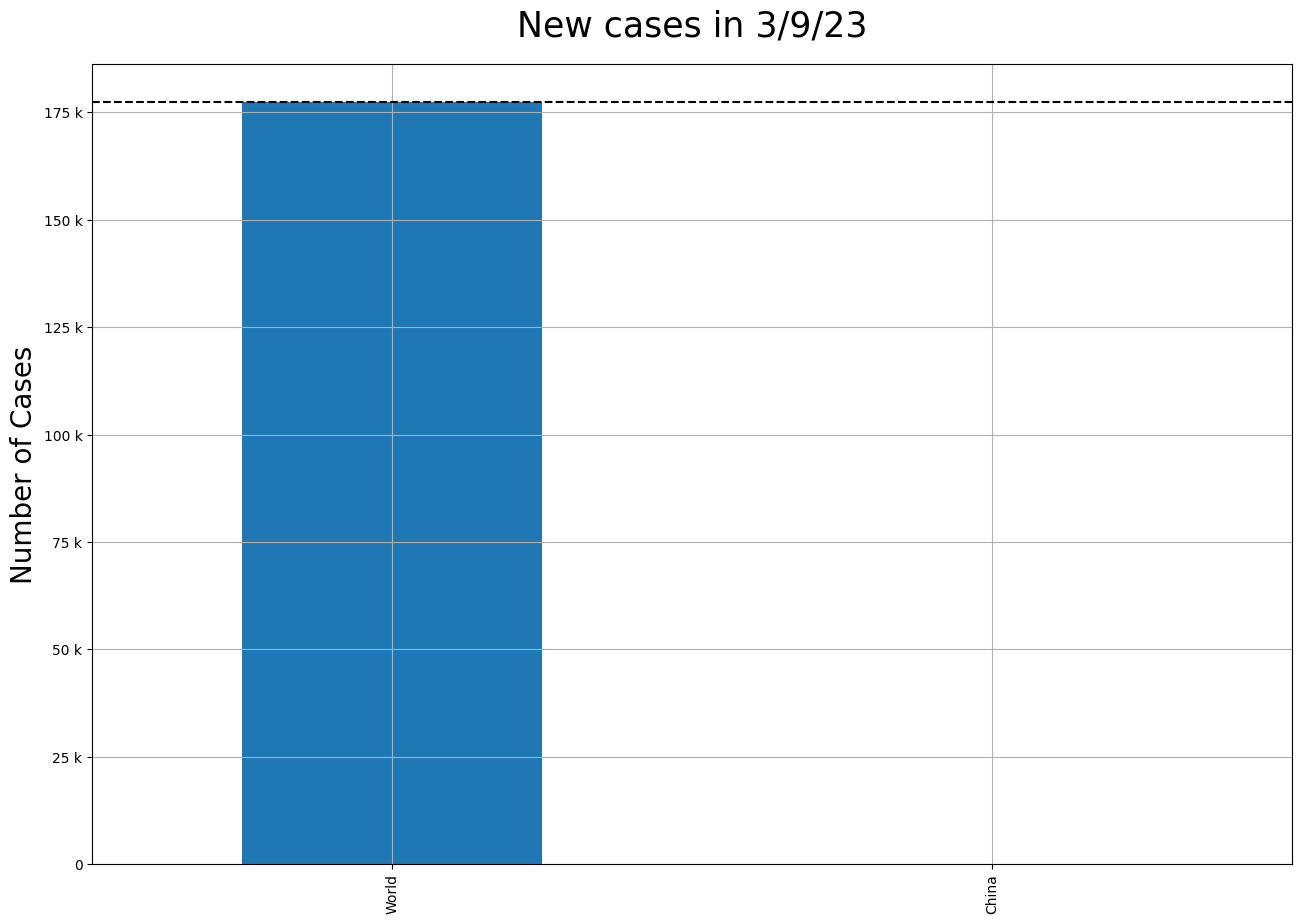

In [34]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

china_world["delta"] = china_world[last_date]-china_world["3/8/23"]

ax = china_world["delta"].plot(kind="bar")
ax.set_title(f"New cases in {last_date}",fontsize=25, pad=20)
ax.set_xlabel(None)
ax.set_ylabel("Number of Cases", fontsize=20)
ax.set_xticklabels(["World", "China"])
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.axhline(max(china_world["delta"]), color="k", linestyle="--")
ax.grid(True)
fig.show()

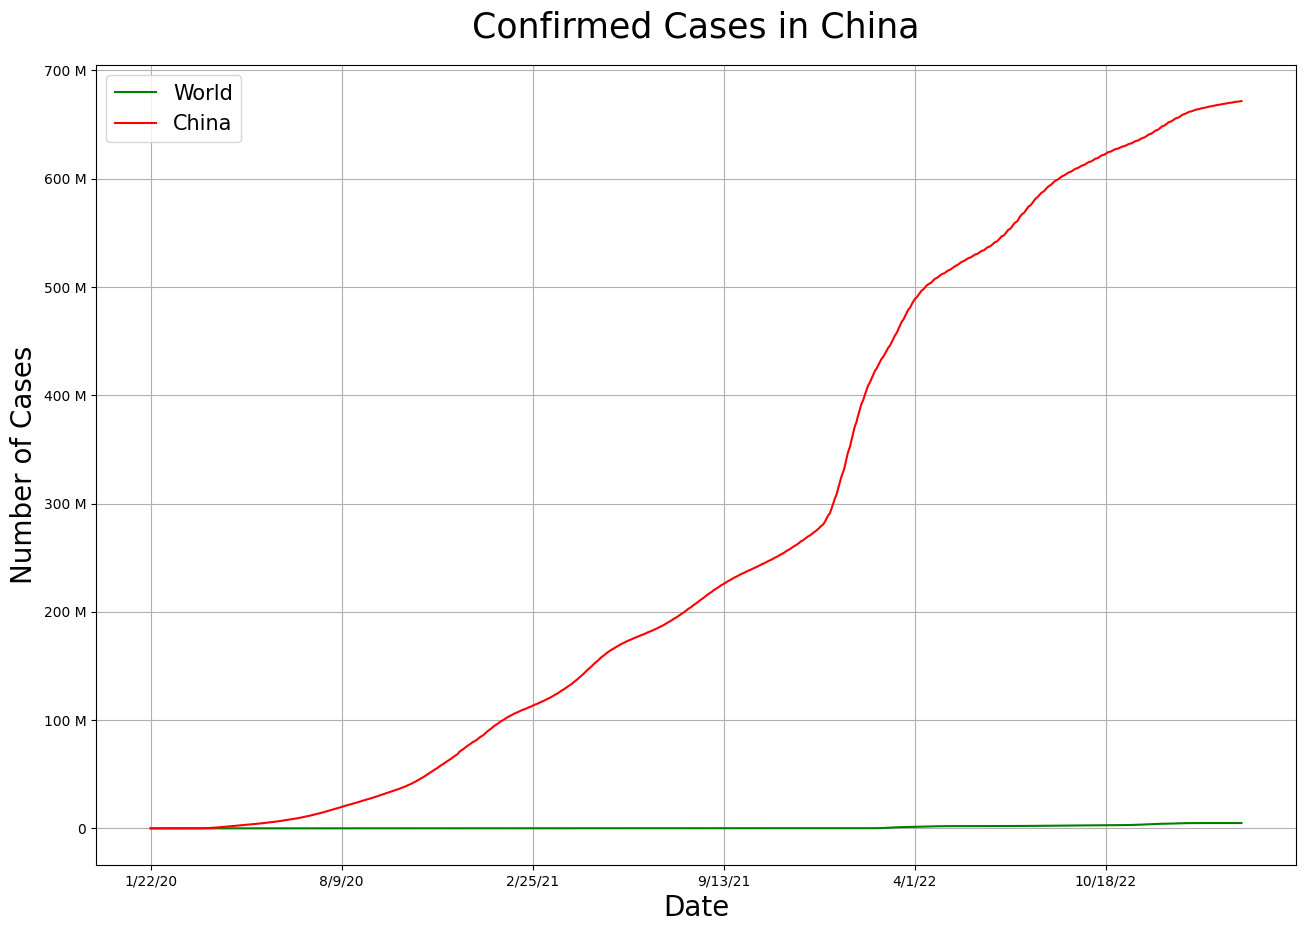

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

china_world.loc[True][2:-1].plot(color="g")
china_world.loc[False][2:-1].plot(color="r")
ax.set_title("Confirmed Cases in China",fontsize=25, pad=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Number of Cases", fontsize=20)
ax.legend({"World":"r", "China":"g"}, fontsize=15)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)

fig.show()

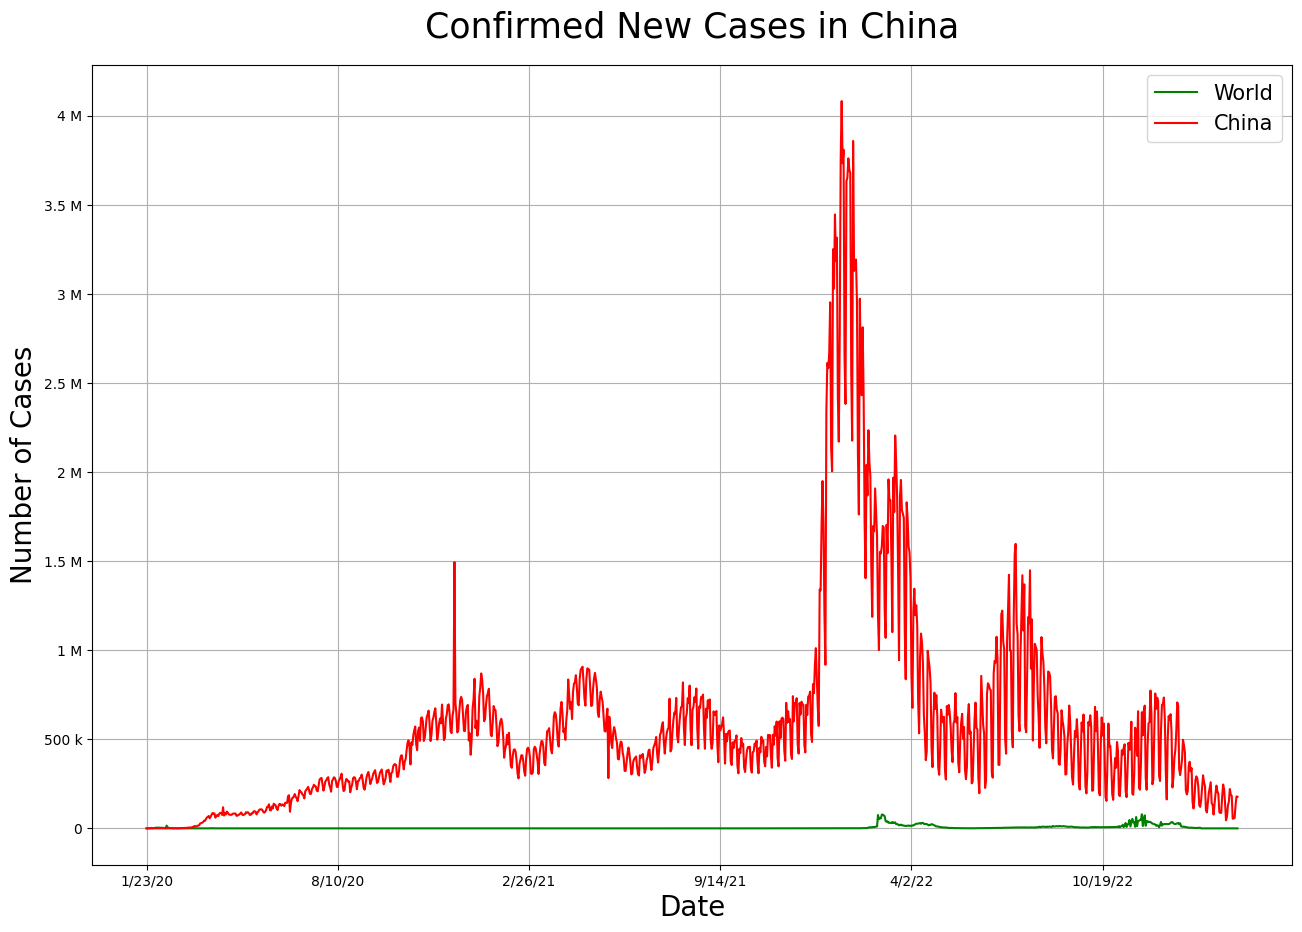

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

china_world.loc[True][2:-1].diff().dropna().plot(color="g")
china_world.loc[False][2:-1].diff().dropna().plot(color="r")
ax.set_title("Confirmed New Cases in China",fontsize=25, pad=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Number of Cases", fontsize=20)
ax.legend({"World":"r", "China":"g"}, fontsize=15)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)

fig.show()

## Casos de Incidência na China (Pior maneira de calcular)

In [37]:
# Variável falha, pois não deveria ser utilizada uma estimativa de população total do país mas sim a população das províncias que foram afetadas.

cases = confirmed.groupby("Country/Region").sum()[last_date].loc["China"]
estimated_population = 1437525528

incidence_ratio = cases/estimated_population

print(f"{incidence_ratio*10000}")

34.11086554283438


<ipython-input-37-c986a0ab4317>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cases = confirmed.groupby("Country/Region").sum()[last_date].loc["China"]


## Unindo bases de dados do Jhon Hopckins e UN

In [38]:
# https://population.un.org/wpp/Download/Standard/CSV/
un_population = pd.read_csv("/content/drive/MyDrive/Alura/Curso Data Science e Saúde/WPP2022_Population1JanuaryByAge5GroupSex_Medium.csv")
un_population

<ipython-input-38-c59d49eb4f67>:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  un_population = pd.read_csv("/content/drive/MyDrive/Alura/Curso Data Science e Saúde/WPP2022_Population1JanuaryByAge5GroupSex_Medium.csv")


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,0-4,0,5,170451.218,163206.503,333657.721
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,5-9,5,5,136459.701,130304.242,266763.943
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,10-14,10,5,131620.815,125619.997,257240.812
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,15-19,15,5,119914.055,116088.462,236002.517
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,20-24,20,5,110159.628,108388.532,218548.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909715,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,2,Medium,2101,2101,80-84,80,5,0.254,0.261,0.515
909716,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,2,Medium,2101,2101,85-89,85,5,0.238,0.265,0.503
909717,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,2,Medium,2101,2101,90-94,90,5,0.173,0.200,0.373
909718,290,876,2.0,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,2,Medium,2101,2101,95-99,95,5,0.075,0.111,0.186


In [39]:
un_population.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,MidPeriod,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
count,909720.000000,909720.000000,896952.000000,909720.000000,909720.000000,909720.0,909720.000000,909720.000000,909720.00000,909720.000000,909720.000000,909720.000000,909720.000000
mean,147.210526,598.280702,410.352313,4.312281,1218.985965,2.0,2025.500000,2025.500000,50.00000,4.714286,5830.502581,5819.563743,11650.066324
std,82.955569,566.397059,269.276921,1.902176,1006.215901,0.0,43.877695,43.877695,30.27652,1.277754,26830.391580,26170.308183,52980.816712
min,1.000000,4.000000,1.000000,1.000000,0.000000,2.0,1950.000000,1950.000000,0.00000,-1.000000,0.000000,0.000000,0.000000
25%,76.000000,266.000000,158.000000,4.000000,914.000000,2.0,1987.750000,1987.750000,25.00000,5.000000,3.323750,4.243000,7.720000
50%,147.000000,531.000000,417.000000,4.000000,922.000000,2.0,2025.500000,2025.500000,50.00000,5.000000,86.844000,100.192500,188.928500
75%,219.000000,792.000000,643.000000,4.000000,931.000000,2.0,2063.250000,2063.250000,75.00000,5.000000,859.472750,929.346750,1795.077250
max,290.000000,5501.000000,914.000000,13.000000,5501.000000,2.0,2101.000000,2101.000000,100.00000,5.000000,356170.553000,334475.330000,690645.883000


In [40]:
pop_2023 = un_population.query("Time == 2023")[["Location","PopTotal"]]
pop_2023.set_index("Location")

,PopTotal
Location,
World,659050.441
World,684141.409
World,669817.961
World,632116.033
World,605472.911
...,...
Wallis and Futuna Islands,0.180
Wallis and Futuna Islands,0.102
Wallis and Futuna Islands,0.030


In [41]:
pop_2023 = pop_2023.groupby("Location").sum()
pop_2023["PopTotal"] = pop_2023["PopTotal"]*1000
pop_2023

,PopTotal
Location,
Afghanistan,4.167705e+07
Africa,1.443404e+09
Albania,2.836789e+06
Algeria,4.526286e+07
American Samoa,4.409900e+04
...,...
Western Sahara,5.816600e+05
World,8.008552e+09
Yemen,3.407091e+07


In [42]:
combined_expanded = combined.join(pop_2023).dropna()
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Country/Region,,,,,,
Afghanistan,209451,7896,0,3.769855,100.0,41677052.0
Albania,334457,3598,0,1.075774,100.0,2836789.0
Algeria,271496,6881,0,2.534476,100.0,45262858.0
Andorra,47890,165,0,0.344540,100.0,79960.0
Angola,105288,1933,0,1.835917,100.0,36128402.0
Antigua and Barbuda,9106,146,0,1.603338,100.0,94038.0
Argentina,10044957,130472,0,1.298881,100.0,45630699.0
Armenia,447308,8727,0,1.951005,100.0,2777712.0
Australia,11399460,19574,0,0.171710,100.0,26308571.0


In [43]:
# Taxa de incidência e Taxa de mortalidade a cada 100000 habitantes

combined_expanded["incidence_ratio"] = 100000*(combined_expanded["confirmed"]/combined_expanded["PopTotal"])
combined_expanded["mortality_rate"] = 100000*(combined_expanded["deaths"]/combined_expanded["PopTotal"])
combined_expanded.sort_values("PopTotal", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_rate
Country/Region,,,,,,,,
China,4903524,101056,0,2.060885,100.0,1.425849e+09,343.901985,7.087425
India,44690738,530779,0,1.187671,100.0,1.422027e+09,3142.749950,37.325534
Indonesia,6738225,160941,0,2.388478,100.0,2.763864e+08,2437.972805,58.230436
Pakistan,1577411,30644,0,1.942677,100.0,2.381261e+08,662.426720,12.868811
Nigeria,266598,3155,0,1.183430,100.0,2.211540e+08,120.548581,1.426608
Brazil,37076053,699276,0,1.886058,100.0,2.158022e+08,17180.570550,324.035588
Bangladesh,2037871,29445,0,1.444890,100.0,1.720752e+08,1184.291275,17.111710
Mexico,7483444,333188,0,4.452335,100.0,1.279841e+08,5847.166176,260.335429
Ethiopia,500116,7572,0,1.514049,100.0,1.249373e+08,400.293719,6.060642


In [44]:
confirmed.sort_values(last_date, ascending=False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_china
260,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702,False
148,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738,False
131,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,38583794,38587990,38591184,38591184,38591184,38599330,38606393,38612201,38618509,False
135,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060,False
31,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,False
275,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,False
161,NaN,"Korea, North",40.339900,127.510100,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,False
268,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


## Comparação entre as taxas de covid e influenza nos EUA

In [45]:
pop_2023.query(" Location.str.contains('U')", engine="python")

,PopTotal
Location,
Kosovo (under UNSC res. 1244),1.661667e+06
Uganda,4.791497e+07
Ukraine,3.606927e+07
United Arab Emirates,9.478996e+06
United Kingdom,6.762357e+07
United Republic of Tanzania,6.645590e+07
United States Virgin Islands,9.909000e+04
United States of America,3.390802e+08
Upper-middle-income countries,2.529149e+09


In [46]:
# COVID stats
# Vale lembrar que os dados de casos confirmados podem ser diferentes nas duas bases de dados
pop_us = pop_2023.loc["United States of America"]["PopTotal"]

letality_rate_3 = combined.loc["US"]["letality_rate_1"]
incidence_ratio = confirmed.set_index("Country/Region").loc["US"][last_date]/pop_us *100000
mortality_rate = deaths.set_index("Country/Region").loc["US"][last_date]/pop_us *100000
print(f"Leatality rate: {letality_rate_1}")
print(f"Incidence_ratio: {incidence_ratio}")
print(f"Mortality_rate: {mortality_rate}")

Leatality rate: Country/Region
Afghanistan              3.769855
Albania                  1.075774
Algeria                  2.534476
Andorra                  0.344540
Angola                   1.835917
                          ...    
West Bank and Gaza       0.811686
Winter Olympics 2022     0.000000
Yemen                   18.074508
Zambia                   1.182333
Zimbabwe                 2.145863
Length: 201, dtype: float64
Incidence_ratio: 30613.020543648025
Mortality_rate: 331.43659936415935


In [47]:
# Influenza stats 2022-2023
# https://www.cdc.gov/flu/about/burden/past-seasons.html

letality_rate_hospitalization = 21000/360000 * 100
letality_rate_medical_visit = 21000/14000000 * 100
letality_rate_symptomatic = 21000/31000000 * 100
incidence_ratio = 31000000/pop_us * 100000
mortality_rate = 21000/pop_us *100000
print(f"Leatality rate hospitalization 2022-2023: {letality_rate_hospitalization}")
print(f"Leatality rate medical visit 2022-2023: {letality_rate_medical_visit}")
print(f"Leatality rate symptomatic 2022-2023: {letality_rate_symptomatic}")
print(f"Incidence_ratio 2022-2023: {incidence_ratio}")
print(f"Mortality_rate 2022-2023: {mortality_rate}")

Leatality rate hospitalization 2022-2023: 5.833333333333333
Leatality rate medical visit 2022-2023: 0.15
Leatality rate symptomatic 2022-2023: 0.06774193548387097
Incidence_ratio 2022-2023: 9142.378941668481
Mortality_rate 2022-2023: 6.193224444356068


## Gráficos Finais

In [48]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1],deaths.sum()[3:]],
                               index=["confirmed", "deaths"]).T
grouped_per_day.head()

<ipython-input-48-9cb5cfdb4293>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1],deaths.sum()[3:]],
<ipython-input-48-9cb5cfdb4293>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1],deaths.sum()[3:]],


,confirmed,deaths
1/22/20,557,17
1/23/20,657,18
1/24/20,944,26
1/25/20,1437,42
1/26/20,2120,56


In [49]:
grouped_per_day["letality_rate"] = grouped_per_day["deaths"]/grouped_per_day["confirmed"] *100
grouped_per_day.head()

,confirmed,deaths,letality_rate
1/22/20,557,17,3.052065
1/23/20,657,18,2.739726
1/24/20,944,26,2.754237
1/25/20,1437,42,2.922756
1/26/20,2120,56,2.641509


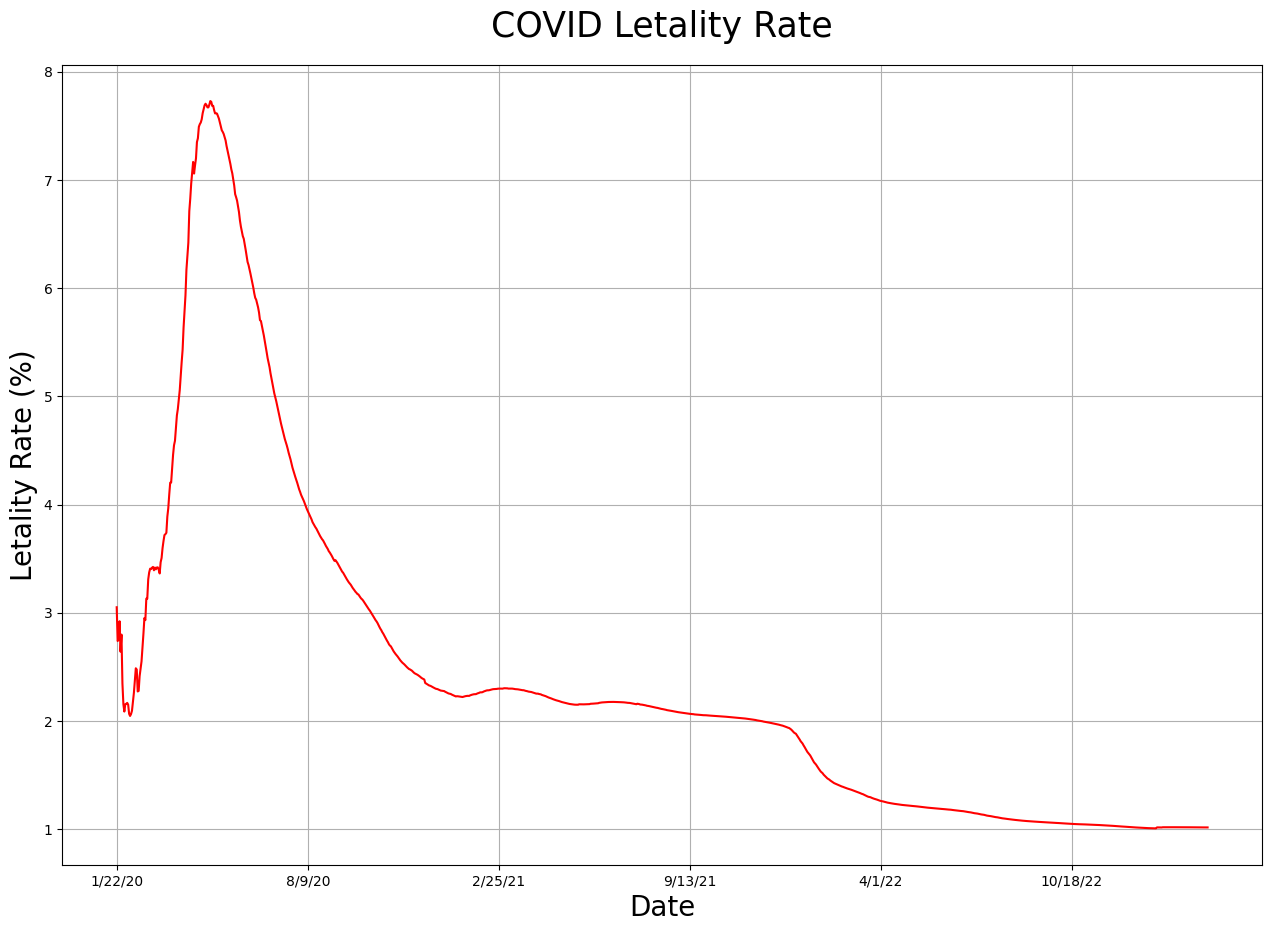

In [50]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

grouped_per_day["letality_rate"].plot(color="r")
ax.set_title("COVID Letality Rate",fontsize=25, pad=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Letality Rate (%)", fontsize=20)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.grid(True)

fig.show()